In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Holt Winter's Exponential Smoothing

In [24]:
casesURL = "https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/cases-rki-by-state.csv"
df=pd.read_csv(casesURL)

df = df.loc[:, ['time_iso8601','DE-BW']]
df["dailyChange"] =  df['DE-BW'].diff().fillna(df['DE-BW'])
df.drop(['DE-BW'], axis=1, inplace=True)

## Create my Numpy Array
df["dailyChange"] = df["dailyChange"].apply(np.int64)
print(df.head())
npArray = np.empty(shape=(1,len(df.index)), dtype=int)
## Filling numpy array with values // specify training data
for i in range (len(df.index)):
    npArray[0][i] = df['dailyChange'][i]

               time_iso8601  dailyChange
0  2020-03-02T17:00:00+0000           30
1  2020-03-03T17:00:00+0000           24
2  2020-03-04T17:00:00+0000           38
3  2020-03-05T17:00:00+0000           36
4  2020-03-06T17:00:00+0000           51


## Define Model

In [46]:
model = ExponentialSmoothing(npArray[0], seasonal_periods=12, trend="add", seasonal="mul")
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [47]:
prediction = 20
#Make one Prediction
#yhat = model_fit.predict(start=len(npArray[0]), end=len(npArray[0]))
predicYhat = model_fit.predict(1, (npArray.size + prediction))

In [48]:
def zeroToNan(values):
    return [float('nan') if x==0 else x for x in values]

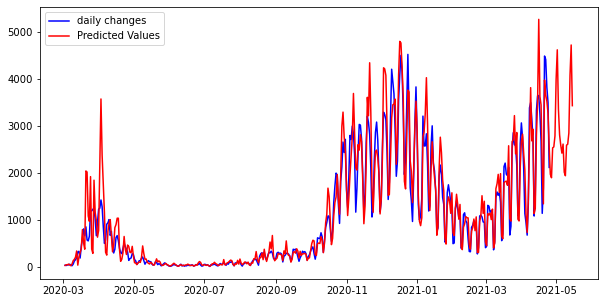

In [49]:
# Adding the future values so dates index match wit x index
npTemp = np.zeros((prediction), dtype=int)
npAddedValues= np.concatenate((npArray[0], npTemp), axis=None)
# Also matching the forecasted values to the x index
# Change all Zeros to nan so matlatlib doesnt print it
npAddedValues = zeroToNan(npAddedValues)

# Setting plot options
df2 = pd.date_range(start=df['time_iso8601'][0], periods=len(df)+prediction, freq='D')
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(df2, npAddedValues, 'b', label = 'daily changes', linewidth = 1.5)
plt.plot(df2, predicYhat, 'r', label = 'Predicted Values')
plt.legend()
plt.show()